#FETCHING DATA THROUGH ArXiv API

In [ ]:
!pip install feedparser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 817.1 kB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=725f32a39f6417a572f77bf5c8d0e87951ca945a08cbcadd57535f10b06924c2
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k


In [ ]:
import requests
import feedparser
import time
import math
import csv
from datetime import datetime

def fetch_arxiv_papers(search_query, total_results=10000, batch_size=100, sort_by='relevance', sort_order='descending', delay=3):
    base_url = 'http://export.arxiv.org/api/query?'
    max_batch_size = 1000

    if batch_size > max_batch_size:
        print(f"Batch size {batch_size} exceeds maximum of {max_batch_size}. Setting to {max_batch_size}.")
        batch_size = max_batch_size

    num_batches = math.ceil(total_results / batch_size)
    print(f"Total results to fetch: {total_results}")
    print(f"Fetching in {num_batches} batches of up to {batch_size} papers each.")

    all_papers = []

    for batch_num in range(num_batches):
        start = batch_num * batch_size
        current_batch_size = min(batch_size, total_results - start)
        params = {
            'search_query': f'all:{search_query}',
            'start': start,
            'max_results': current_batch_size,
            'sortBy': sort_by,
            'sortOrder': sort_order
        }

        try:
            response = requests.get(base_url, params=params)
            if response.status_code != 200:
                print(f"Error fetching batch {batch_num + 1}: HTTP {response.status_code}")
                break

            feed = feedparser.parse(response.text)

            for entry in feed.entries:
                paper = {
                    'title': entry.title.strip().replace('\n', ' '),
                    'authors': ', '.join([author.name for author in entry.authors]),
                    'summary': entry.summary.strip().replace('\n', ' '),
                    'published': entry.published,
                    'updated': entry.updated,
                    'link': entry.link,
                    'pdf_url': None,
                    'categories': ', '.join(tag.term for tag in entry.tags) if 'tags' in entry else 'N/A'
                }

                for link in entry.links:
                    if link.rel == 'related' and link.type == 'application/pdf':
                        paper['pdf_url'] = link.href
                        break

                all_papers.append(paper)

            print(f"Fetched batch {batch_num + 1}/{num_batches} (start: {start})")
            time.sleep(delay)

        except Exception as e:
            print(f"An error occurred during batch {batch_num + 1}: {str(e)}")
            break

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"arxiv_papers_{search_query.replace(' ', '_')}_{timestamp}.csv"

    with open(filename, mode='w', encoding='utf-8', newline='') as csv_file:
        fieldnames = ['title', 'authors', 'summary', 'published', 'updated', 'link', 'pdf_url', 'categories']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        writer.writeheader()
        for paper in all_papers:
            writer.writerow(paper)

    print(f"Data fetching complete. {len(all_papers)} papers saved to {filename}.")


if __name__ == "__main__":
    search_term = "computer science"
    total_papers = 10000  # Total number of papers to fetch
    batch_size = 100        # Number of papers per request (adjust as needed)
    delay_seconds = 3      # Delay between requests to respect rate limits

    fetch_arxiv_papers(
        search_query=search_term,
        total_results=total_papers,
        batch_size=batch_size,
        sort_by='relevance',
        sort_order='descending',
        delay=delay_seconds
    )

Total results to fetch: 10000
Fetching in 100 batches of up to 100 papers each.
Fetched batch 1/100 (start: 0)
Fetched batch 2/100 (start: 100)
Fetched batch 3/100 (start: 200)
Fetched batch 4/100 (start: 300)
Fetched batch 5/100 (start: 400)
Fetched batch 6/100 (start: 500)
Fetched batch 7/100 (start: 600)
Fetched batch 8/100 (start: 700)
Fetched batch 9/100 (start: 800)
Fetched batch 10/100 (start: 900)
Fetched batch 11/100 (start: 1000)
Fetched batch 12/100 (start: 1100)
Fetched batch 13/100 (start: 1200)
Fetched batch 14/100 (start: 1300)
Fetched batch 15/100 (start: 1400)
Fetched batch 16/100 (start: 1500)
Fetched batch 17/100 (start: 1600)
Fetched batch 18/100 (start: 1700)
Fetched batch 19/100 (start: 1800)
Fetched batch 20/100 (start: 1900)
Fetched batch 21/100 (start: 2000)
Fetched batch 22/100 (start: 2100)
Fetched batch 23/100 (start: 2200)
Fetched batch 24/100 (start: 2300)
Fetched batch 25/100 (start: 2400)
Fetched batch 26/100 (start: 2500)
Fetched batch 27/100 (start: 26

In [ ]:
import requests
import feedparser
import time
import math
import csv
from datetime import datetime

def fetch_arxiv_papers(search_query, total_results=10000, batch_size=100, sort_by='relevance', sort_order='descending', delay=3):
    base_url = 'http://export.arxiv.org/api/query?'
    max_batch_size = 1000

    if batch_size > max_batch_size:
        print(f"Batch size {batch_size} exceeds maximum of {max_batch_size}. Setting to {max_batch_size}.")
        batch_size = max_batch_size

    num_batches = math.ceil(total_results / batch_size)
    print(f"Total results to fetch: {total_results}")
    print(f"Fetching in {num_batches} batches of up to {batch_size} papers each.")

    all_papers = []

    for batch_num in range(num_batches):
        start = batch_num * batch_size
        current_batch_size = min(batch_size, total_results - start)
        params = {
            'search_query': f'all:{search_query}',
            'start': start,
            'max_results': current_batch_size,
            'sortBy': sort_by,
            'sortOrder': sort_order
        }

        try:
            response = requests.get(base_url, params=params)
            if response.status_code != 200:
                print(f"Error fetching batch {batch_num + 1}: HTTP {response.status_code}")
                break

            feed = feedparser.parse(response.text)

            for entry in feed.entries:
                paper = {
                    'title': entry.title.strip().replace('\n', ' '),
                    'authors': ', '.join([author.name for author in entry.authors]),
                    'summary': entry.summary.strip().replace('\n', ' '),
                    'published': entry.published,
                    'updated': entry.updated,
                    'link': entry.link,
                    'pdf_url': None,
                    'categories': ', '.join(tag.term for tag in entry.tags) if 'tags' in entry else 'N/A'
                }

                for link in entry.links:
                    if link.rel == 'related' and link.type == 'application/pdf':
                        paper['pdf_url'] = link.href
                        break

                all_papers.append(paper)

            print(f"Fetched batch {batch_num + 1}/{num_batches} (start: {start})")
            time.sleep(delay)

        except Exception as e:
            print(f"An error occurred during batch {batch_num + 1}: {str(e)}")
            break

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"arxiv_papers_{search_query.replace(' ', '_')}_{timestamp}.csv"

    with open(filename, mode='w', encoding='utf-8', newline='') as csv_file:
        fieldnames = ['title', 'authors', 'summary', 'published', 'updated', 'link', 'pdf_url', 'categories']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        writer.writeheader()
        for paper in all_papers:
            writer.writerow(paper)

    print(f"Data fetching complete. {len(all_papers)} papers saved to {filename}.")


if __name__ == "__main__":
    search_term = "physic"
    total_papers = 10000  # Total number of papers to fetch
    batch_size = 100        # Number of papers per request (adjust as needed)
    delay_seconds = 3      # Delay between requests to respect rate limits

    fetch_arxiv_papers(
        search_query=search_term,
        total_results=total_papers,
        batch_size=batch_size,
        sort_by='relevance',
        sort_order='descending',
        delay=delay_seconds
    )

Total results to fetch: 10000
Fetching in 100 batches of up to 100 papers each.
Fetched batch 1/100 (start: 0)
Fetched batch 2/100 (start: 100)
Fetched batch 3/100 (start: 200)
Fetched batch 4/100 (start: 300)
Fetched batch 5/100 (start: 400)
Fetched batch 6/100 (start: 500)
Fetched batch 7/100 (start: 600)
Fetched batch 8/100 (start: 700)
Fetched batch 9/100 (start: 800)
Fetched batch 10/100 (start: 900)
Fetched batch 11/100 (start: 1000)
Fetched batch 12/100 (start: 1100)
Fetched batch 13/100 (start: 1200)
Fetched batch 14/100 (start: 1300)
Fetched batch 15/100 (start: 1400)
Fetched batch 16/100 (start: 1500)
Fetched batch 17/100 (start: 1600)
Fetched batch 18/100 (start: 1700)
Fetched batch 19/100 (start: 1800)
Fetched batch 20/100 (start: 1900)
Fetched batch 21/100 (start: 2000)
Fetched batch 22/100 (start: 2100)
Fetched batch 23/100 (start: 2200)
Fetched batch 24/100 (start: 2300)
Fetched batch 25/100 (start: 2400)
Fetched batch 26/100 (start: 2500)
Fetched batch 27/100 (start: 26

In [ ]:
import requests
import feedparser
import time
import math
import csv
from datetime import datetime

def fetch_arxiv_papers(search_query, total_results=10000, batch_size=100, sort_by='relevance', sort_order='descending', delay=3):
    base_url = 'http://export.arxiv.org/api/query?'
    max_batch_size = 1000

    if batch_size > max_batch_size:
        print(f"Batch size {batch_size} exceeds maximum of {max_batch_size}. Setting to {max_batch_size}.")
        batch_size = max_batch_size

    num_batches = math.ceil(total_results / batch_size)
    print(f"Total results to fetch: {total_results}")
    print(f"Fetching in {num_batches} batches of up to {batch_size} papers each.")

    all_papers = []

    for batch_num in range(num_batches):
        start = batch_num * batch_size
        current_batch_size = min(batch_size, total_results - start)
        params = {
            'search_query': f'all:{search_query}',
            'start': start,
            'max_results': current_batch_size,
            'sortBy': sort_by,
            'sortOrder': sort_order
        }

        try:
            response = requests.get(base_url, params=params)
            if response.status_code != 200:
                print(f"Error fetching batch {batch_num + 1}: HTTP {response.status_code}")
                break

            feed = feedparser.parse(response.text)

            for entry in feed.entries:
                paper = {
                    'title': entry.title.strip().replace('\n', ' '),
                    'authors': ', '.join([author.name for author in entry.authors]),
                    'summary': entry.summary.strip().replace('\n', ' '),
                    'published': entry.published,
                    'updated': entry.updated,
                    'link': entry.link,
                    'pdf_url': None,
                    'categories': ', '.join(tag.term for tag in entry.tags) if 'tags' in entry else 'N/A'
                }

                for link in entry.links:
                    if link.rel == 'related' and link.type == 'application/pdf':
                        paper['pdf_url'] = link.href
                        break

                all_papers.append(paper)

            print(f"Fetched batch {batch_num + 1}/{num_batches} (start: {start})")
            time.sleep(delay)

        except Exception as e:
            print(f"An error occurred during batch {batch_num + 1}: {str(e)}")
            break

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"arxiv_papers_{search_query.replace(' ', '_')}_{timestamp}.csv"

    with open(filename, mode='w', encoding='utf-8', newline='') as csv_file:
        fieldnames = ['title', 'authors', 'summary', 'published', 'updated', 'link', 'pdf_url', 'categories']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        writer.writeheader()
        for paper in all_papers:
            writer.writerow(paper)

    print(f"Data fetching complete. {len(all_papers)} papers saved to {filename}.")


if __name__ == "__main__":
    search_term = "network"
    total_papers = 10000  # Total number of papers to fetch
    batch_size = 100        # Number of papers per request (adjust as needed)
    delay_seconds = 3      # Delay between requests to respect rate limits

    fetch_arxiv_papers(
        search_query=search_term,
        total_results=total_papers,
        batch_size=batch_size,
        sort_by='relevance',
        sort_order='descending',
        delay=delay_seconds
    )

Total results to fetch: 10000
Fetching in 100 batches of up to 100 papers each.
Fetched batch 1/100 (start: 0)
Fetched batch 2/100 (start: 100)
Fetched batch 3/100 (start: 200)
Fetched batch 4/100 (start: 300)
Fetched batch 5/100 (start: 400)
Fetched batch 6/100 (start: 500)
Fetched batch 7/100 (start: 600)
Fetched batch 8/100 (start: 700)
Fetched batch 9/100 (start: 800)
Fetched batch 10/100 (start: 900)
Fetched batch 11/100 (start: 1000)
Fetched batch 12/100 (start: 1100)
Fetched batch 13/100 (start: 1200)
Fetched batch 14/100 (start: 1300)
Fetched batch 15/100 (start: 1400)
Fetched batch 16/100 (start: 1500)
Fetched batch 17/100 (start: 1600)
Fetched batch 18/100 (start: 1700)
Fetched batch 19/100 (start: 1800)
Fetched batch 20/100 (start: 1900)
Fetched batch 21/100 (start: 2000)
Fetched batch 22/100 (start: 2100)
Fetched batch 23/100 (start: 2200)
Fetched batch 24/100 (start: 2300)
Fetched batch 25/100 (start: 2400)
Fetched batch 26/100 (start: 2500)
Fetched batch 27/100 (start: 26

In [ ]:
import requests
import feedparser
import time
import math
import csv
from datetime import datetime

def fetch_arxiv_papers(search_query, total_results=10000, batch_size=100, sort_by='relevance', sort_order='descending', delay=3):
    base_url = 'http://export.arxiv.org/api/query?'
    max_batch_size = 1000

    if batch_size > max_batch_size:
        print(f"Batch size {batch_size} exceeds maximum of {max_batch_size}. Setting to {max_batch_size}.")
        batch_size = max_batch_size

    num_batches = math.ceil(total_results / batch_size)
    print(f"Total results to fetch: {total_results}")
    print(f"Fetching in {num_batches} batches of up to {batch_size} papers each.")

    all_papers = []

    for batch_num in range(num_batches):
        start = batch_num * batch_size
        current_batch_size = min(batch_size, total_results - start)
        params = {
            'search_query': f'all:{search_query}',
            'start': start,
            'max_results': current_batch_size,
            'sortBy': sort_by,
            'sortOrder': sort_order
        }

        try:
            response = requests.get(base_url, params=params)
            if response.status_code != 200:
                print(f"Error fetching batch {batch_num + 1}: HTTP {response.status_code}")
                break

            feed = feedparser.parse(response.text)

            for entry in feed.entries:
                paper = {
                    'title': entry.title.strip().replace('\n', ' '),
                    'authors': ', '.join([author.name for author in entry.authors]),
                    'summary': entry.summary.strip().replace('\n', ' '),
                    'published': entry.published,
                    'updated': entry.updated,
                    'link': entry.link,
                    'pdf_url': None,
                    'categories': ', '.join(tag.term for tag in entry.tags) if 'tags' in entry else 'N/A'
                }

                for link in entry.links:
                    if link.rel == 'related' and link.type == 'application/pdf':
                        paper['pdf_url'] = link.href
                        break

                all_papers.append(paper)

            print(f"Fetched batch {batch_num + 1}/{num_batches} (start: {start})")
            time.sleep(delay)

        except Exception as e:
            print(f"An error occurred during batch {batch_num + 1}: {str(e)}")
            break

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"arxiv_papers_{search_query.replace(' ', '_')}_{timestamp}.csv"

    with open(filename, mode='w', encoding='utf-8', newline='') as csv_file:
        fieldnames = ['title', 'authors', 'summary', 'published', 'updated', 'link', 'pdf_url', 'categories']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        writer.writeheader()
        for paper in all_papers:
            writer.writerow(paper)

    print(f"Data fetching complete. {len(all_papers)} papers saved to {filename}.")


if __name__ == "__main__":
    search_term = "data"
    total_papers = 10000  # Total number of papers to fetch
    batch_size = 100        # Number of papers per request (adjust as needed)
    delay_seconds = 3      # Delay between requests to respect rate limits

    fetch_arxiv_papers(
        search_query=search_term,
        total_results=total_papers,
        batch_size=batch_size,
        sort_by='relevance',
        sort_order='descending',
        delay=delay_seconds
    )

Total results to fetch: 10000
Fetching in 100 batches of up to 100 papers each.
Fetched batch 1/100 (start: 0)
Fetched batch 2/100 (start: 100)
Fetched batch 3/100 (start: 200)
Fetched batch 4/100 (start: 300)
Fetched batch 5/100 (start: 400)
Fetched batch 6/100 (start: 500)
Fetched batch 7/100 (start: 600)
Fetched batch 8/100 (start: 700)
Fetched batch 9/100 (start: 800)
Fetched batch 10/100 (start: 900)
Fetched batch 11/100 (start: 1000)
Fetched batch 12/100 (start: 1100)
Fetched batch 13/100 (start: 1200)
Fetched batch 14/100 (start: 1300)
Fetched batch 15/100 (start: 1400)
Fetched batch 16/100 (start: 1500)
Fetched batch 17/100 (start: 1600)
Fetched batch 18/100 (start: 1700)
Fetched batch 19/100 (start: 1800)
Fetched batch 20/100 (start: 1900)
Fetched batch 21/100 (start: 2000)
Fetched batch 22/100 (start: 2100)
Fetched batch 23/100 (start: 2200)
Fetched batch 24/100 (start: 2300)
Fetched batch 25/100 (start: 2400)
Fetched batch 26/100 (start: 2500)
Fetched batch 27/100 (start: 26

In [ ]:
import requests
import feedparser
import time
import math
import csv
from datetime import datetime

def fetch_arxiv_papers(search_query, total_results=10000, batch_size=100, sort_by='relevance', sort_order='descending', delay=3):
    base_url = 'http://export.arxiv.org/api/query?'
    max_batch_size = 1000

    if batch_size > max_batch_size:
        print(f"Batch size {batch_size} exceeds maximum of {max_batch_size}. Setting to {max_batch_size}.")
        batch_size = max_batch_size

    num_batches = math.ceil(total_results / batch_size)
    print(f"Total results to fetch: {total_results}")
    print(f"Fetching in {num_batches} batches of up to {batch_size} papers each.")

    all_papers = []

    for batch_num in range(num_batches):
        start = batch_num * batch_size
        current_batch_size = min(batch_size, total_results - start)
        params = {
            'search_query': f'all:{search_query}',
            'start': start,
            'max_results': current_batch_size,
            'sortBy': sort_by,
            'sortOrder': sort_order
        }

        try:
            response = requests.get(base_url, params=params)
            if response.status_code != 200:
                print(f"Error fetching batch {batch_num + 1}: HTTP {response.status_code}")
                break

            feed = feedparser.parse(response.text)

            for entry in feed.entries:
                paper = {
                    'title': entry.title.strip().replace('\n', ' '),
                    'authors': ', '.join([author.name for author in entry.authors]),
                    'summary': entry.summary.strip().replace('\n', ' '),
                    'published': entry.published,
                    'updated': entry.updated,
                    'link': entry.link,
                    'pdf_url': None,
                    'categories': ', '.join(tag.term for tag in entry.tags) if 'tags' in entry else 'N/A'
                }

                for link in entry.links:
                    if link.rel == 'related' and link.type == 'application/pdf':
                        paper['pdf_url'] = link.href
                        break

                all_papers.append(paper)

            print(f"Fetched batch {batch_num + 1}/{num_batches} (start: {start})")
            time.sleep(delay)

        except Exception as e:
            print(f"An error occurred during batch {batch_num + 1}: {str(e)}")
            break

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"arxiv_papers_{search_query.replace(' ', '_')}_{timestamp}.csv"

    with open(filename, mode='w', encoding='utf-8', newline='') as csv_file:
        fieldnames = ['title', 'authors', 'summary', 'published', 'updated', 'link', 'pdf_url', 'categories']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        writer.writeheader()
        for paper in all_papers:
            writer.writerow(paper)

    print(f"Data fetching complete. {len(all_papers)} papers saved to {filename}.")


if __name__ == "__main__":
    search_term = "signal"
    total_papers = 10000  # Total number of papers to fetch
    batch_size = 100        # Number of papers per request (adjust as needed)
    delay_seconds = 3      # Delay between requests to respect rate limits

    fetch_arxiv_papers(
        search_query=search_term,
        total_results=total_papers,
        batch_size=batch_size,
        sort_by='relevance',
        sort_order='descending',
        delay=delay_seconds
    )

Total results to fetch: 10000
Fetching in 100 batches of up to 100 papers each.
Fetched batch 1/100 (start: 0)
Fetched batch 2/100 (start: 100)
Fetched batch 3/100 (start: 200)
Fetched batch 4/100 (start: 300)
Fetched batch 5/100 (start: 400)
Fetched batch 6/100 (start: 500)
Fetched batch 7/100 (start: 600)
Fetched batch 8/100 (start: 700)
Fetched batch 9/100 (start: 800)
Fetched batch 10/100 (start: 900)
Fetched batch 11/100 (start: 1000)
Fetched batch 12/100 (start: 1100)
Fetched batch 13/100 (start: 1200)
Fetched batch 14/100 (start: 1300)
Fetched batch 15/100 (start: 1400)
Fetched batch 16/100 (start: 1500)
Fetched batch 17/100 (start: 1600)
Fetched batch 18/100 (start: 1700)
Fetched batch 19/100 (start: 1800)
Fetched batch 20/100 (start: 1900)
Fetched batch 21/100 (start: 2000)
Fetched batch 22/100 (start: 2100)
Fetched batch 23/100 (start: 2200)
Fetched batch 24/100 (start: 2300)
Fetched batch 25/100 (start: 2400)
Fetched batch 26/100 (start: 2500)
Fetched batch 27/100 (start: 26

In [ ]:
import requests
import feedparser
import time
import math
import csv
from datetime import datetime

def fetch_arxiv_papers(search_query, total_results=10000, batch_size=100, sort_by='relevance', sort_order='descending', delay=3):
    base_url = 'http://export.arxiv.org/api/query?'
    max_batch_size = 1000

    if batch_size > max_batch_size:
        print(f"Batch size {batch_size} exceeds maximum of {max_batch_size}. Setting to {max_batch_size}.")
        batch_size = max_batch_size

    num_batches = math.ceil(total_results / batch_size)
    print(f"Total results to fetch: {total_results}")
    print(f"Fetching in {num_batches} batches of up to {batch_size} papers each.")

    all_papers = []

    for batch_num in range(num_batches):
        start = batch_num * batch_size
        current_batch_size = min(batch_size, total_results - start)
        params = {
            'search_query': f'all:{search_query}',
            'start': start,
            'max_results': current_batch_size,
            'sortBy': sort_by,
            'sortOrder': sort_order
        }

        try:
            response = requests.get(base_url, params=params)
            if response.status_code != 200:
                print(f"Error fetching batch {batch_num + 1}: HTTP {response.status_code}")
                break

            feed = feedparser.parse(response.text)

            for entry in feed.entries:
                paper = {
                    'title': entry.title.strip().replace('\n', ' '),
                    'authors': ', '.join([author.name for author in entry.authors]),
                    'summary': entry.summary.strip().replace('\n', ' '),
                    'published': entry.published,
                    'updated': entry.updated,
                    'link': entry.link,
                    'pdf_url': None,
                    'categories': ', '.join(tag.term for tag in entry.tags) if 'tags' in entry else 'N/A'
                }

                for link in entry.links:
                    if link.rel == 'related' and link.type == 'application/pdf':
                        paper['pdf_url'] = link.href
                        break

                all_papers.append(paper)

            print(f"Fetched batch {batch_num + 1}/{num_batches} (start: {start})")
            time.sleep(delay)

        except Exception as e:
            print(f"An error occurred during batch {batch_num + 1}: {str(e)}")
            break

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"arxiv_papers_{search_query.replace(' ', '_')}_{timestamp}.csv"

    with open(filename, mode='w', encoding='utf-8', newline='') as csv_file:
        fieldnames = ['title', 'authors', 'summary', 'published', 'updated', 'link', 'pdf_url', 'categories']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        writer.writeheader()
        for paper in all_papers:
            writer.writerow(paper)

    print(f"Data fetching complete. {len(all_papers)} papers saved to {filename}.")


if __name__ == "__main__":
    search_term = "information"
    total_papers = 10000  # Total number of papers to fetch
    batch_size = 100        # Number of papers per request (adjust as needed)
    delay_seconds = 3      # Delay between requests to respect rate limits

    fetch_arxiv_papers(
        search_query=search_term,
        total_results=total_papers,
        batch_size=batch_size,
        sort_by='relevance',
        sort_order='descending',
        delay=delay_seconds
    )

Total results to fetch: 10000
Fetching in 100 batches of up to 100 papers each.
Fetched batch 1/100 (start: 0)
Fetched batch 2/100 (start: 100)
Fetched batch 3/100 (start: 200)
Fetched batch 4/100 (start: 300)
Fetched batch 5/100 (start: 400)
Fetched batch 6/100 (start: 500)
Fetched batch 7/100 (start: 600)
Fetched batch 8/100 (start: 700)
Fetched batch 9/100 (start: 800)
Fetched batch 10/100 (start: 900)
Fetched batch 11/100 (start: 1000)
Fetched batch 12/100 (start: 1100)
Fetched batch 13/100 (start: 1200)
Fetched batch 14/100 (start: 1300)
Fetched batch 15/100 (start: 1400)
Fetched batch 16/100 (start: 1500)
Fetched batch 17/100 (start: 1600)
Fetched batch 18/100 (start: 1700)
Fetched batch 19/100 (start: 1800)
Fetched batch 20/100 (start: 1900)
Fetched batch 21/100 (start: 2000)
Fetched batch 22/100 (start: 2100)
Fetched batch 23/100 (start: 2200)
Fetched batch 24/100 (start: 2300)
Fetched batch 25/100 (start: 2400)
Fetched batch 26/100 (start: 2500)
Fetched batch 27/100 (start: 26

In [ ]:
import requests
import feedparser
import time
import math
import csv
from datetime import datetime

def fetch_arxiv_papers(search_query, total_results=10000, batch_size=100, sort_by='relevance', sort_order='descending', delay=3):
    base_url = 'http://export.arxiv.org/api/query?'
    max_batch_size = 1000

    if batch_size > max_batch_size:
        print(f"Batch size {batch_size} exceeds maximum of {max_batch_size}. Setting to {max_batch_size}.")
        batch_size = max_batch_size

    num_batches = math.ceil(total_results / batch_size)
    print(f"Total results to fetch: {total_results}")
    print(f"Fetching in {num_batches} batches of up to {batch_size} papers each.")

    all_papers = []

    for batch_num in range(num_batches):
        start = batch_num * batch_size
        current_batch_size = min(batch_size, total_results - start)
        params = {
            'search_query': f'all:{search_query}',
            'start': start,
            'max_results': current_batch_size,
            'sortBy': sort_by,
            'sortOrder': sort_order
        }

        try:
            response = requests.get(base_url, params=params)
            if response.status_code != 200:
                print(f"Error fetching batch {batch_num + 1}: HTTP {response.status_code}")
                break

            feed = feedparser.parse(response.text)

            for entry in feed.entries:
                paper = {
                    'title': entry.title.strip().replace('\n', ' '),
                    'authors': ', '.join([author.name for author in entry.authors]),
                    'summary': entry.summary.strip().replace('\n', ' '),
                    'published': entry.published,
                    'updated': entry.updated,
                    'link': entry.link,
                    'pdf_url': None,
                    'categories': ', '.join(tag.term for tag in entry.tags) if 'tags' in entry else 'N/A'
                }

                for link in entry.links:
                    if link.rel == 'related' and link.type == 'application/pdf':
                        paper['pdf_url'] = link.href
                        break

                all_papers.append(paper)

            print(f"Fetched batch {batch_num + 1}/{num_batches} (start: {start})")
            time.sleep(delay)

        except Exception as e:
            print(f"An error occurred during batch {batch_num + 1}: {str(e)}")
            break

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"arxiv_papers_{search_query.replace(' ', '_')}_{timestamp}.csv"

    with open(filename, mode='w', encoding='utf-8', newline='') as csv_file:
        fieldnames = ['title', 'authors', 'summary', 'published', 'updated', 'link', 'pdf_url', 'categories']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        writer.writeheader()
        for paper in all_papers:
            writer.writerow(paper)

    print(f"Data fetching complete. {len(all_papers)} papers saved to {filename}.")


if __name__ == "__main__":
    search_term = "statistics"
    total_papers = 10000  # Total number of papers to fetch
    batch_size = 100        # Number of papers per request (adjust as needed)
    delay_seconds = 3      # Delay between requests to respect rate limits

    fetch_arxiv_papers(
        search_query=search_term,
        total_results=total_papers,
        batch_size=batch_size,
        sort_by='relevance',
        sort_order='descending',
        delay=delay_seconds
    )

Total results to fetch: 10000
Fetching in 100 batches of up to 100 papers each.
Fetched batch 1/100 (start: 0)
Fetched batch 2/100 (start: 100)
Fetched batch 3/100 (start: 200)
Fetched batch 4/100 (start: 300)
Fetched batch 5/100 (start: 400)
Fetched batch 6/100 (start: 500)
Fetched batch 7/100 (start: 600)
Fetched batch 8/100 (start: 700)
Fetched batch 9/100 (start: 800)
Fetched batch 10/100 (start: 900)
Fetched batch 11/100 (start: 1000)
Fetched batch 12/100 (start: 1100)
Fetched batch 13/100 (start: 1200)
Fetched batch 14/100 (start: 1300)
Fetched batch 15/100 (start: 1400)
Fetched batch 16/100 (start: 1500)
Fetched batch 17/100 (start: 1600)
Fetched batch 18/100 (start: 1700)
Fetched batch 19/100 (start: 1800)
Fetched batch 20/100 (start: 1900)
Fetched batch 21/100 (start: 2000)
Fetched batch 22/100 (start: 2100)
Fetched batch 23/100 (start: 2200)
Fetched batch 24/100 (start: 2300)
Fetched batch 25/100 (start: 2400)
Fetched batch 26/100 (start: 2500)
Fetched batch 27/100 (start: 26

In [ ]:
import requests
import feedparser
import time
import math
import csv
from datetime import datetime

def fetch_arxiv_papers(search_query, total_results=10000, batch_size=100, sort_by='relevance', sort_order='descending', delay=3):
    base_url = 'http://export.arxiv.org/api/query?'
    max_batch_size = 1000

    if batch_size > max_batch_size:
        print(f"Batch size {batch_size} exceeds maximum of {max_batch_size}. Setting to {max_batch_size}.")
        batch_size = max_batch_size

    num_batches = math.ceil(total_results / batch_size)
    print(f"Total results to fetch: {total_results}")
    print(f"Fetching in {num_batches} batches of up to {batch_size} papers each.")

    all_papers = []

    for batch_num in range(num_batches):
        start = batch_num * batch_size
        current_batch_size = min(batch_size, total_results - start)
        params = {
            'search_query': f'all:{search_query}',
            'start': start,
            'max_results': current_batch_size,
            'sortBy': sort_by,
            'sortOrder': sort_order
        }

        try:
            response = requests.get(base_url, params=params)
            if response.status_code != 200:
                print(f"Error fetching batch {batch_num + 1}: HTTP {response.status_code}")
                break

            feed = feedparser.parse(response.text)

            for entry in feed.entries:
                paper = {
                    'title': entry.title.strip().replace('\n', ' '),
                    'authors': ', '.join([author.name for author in entry.authors]),
                    'summary': entry.summary.strip().replace('\n', ' '),
                    'published': entry.published,
                    'updated': entry.updated,
                    'link': entry.link,
                    'pdf_url': None,
                    'categories': ', '.join(tag.term for tag in entry.tags) if 'tags' in entry else 'N/A'
                }

                for link in entry.links:
                    if link.rel == 'related' and link.type == 'application/pdf':
                        paper['pdf_url'] = link.href
                        break

                all_papers.append(paper)

            print(f"Fetched batch {batch_num + 1}/{num_batches} (start: {start})")
            time.sleep(delay)

        except Exception as e:
            print(f"An error occurred during batch {batch_num + 1}: {str(e)}")
            break

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"arxiv_papers_{search_query.replace(' ', '_')}_{timestamp}.csv"

    with open(filename, mode='w', encoding='utf-8', newline='') as csv_file:
        fieldnames = ['title', 'authors', 'summary', 'published', 'updated', 'link', 'pdf_url', 'categories']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        writer.writeheader()
        for paper in all_papers:
            writer.writerow(paper)

    print(f"Data fetching complete. {len(all_papers)} papers saved to {filename}.")


if __name__ == "__main__":
    search_term = "electrical engineering"
    total_papers = 10000  # Total number of papers to fetch
    batch_size = 100        # Number of papers per request (adjust as needed)
    delay_seconds = 3      # Delay between requests to respect rate limits

    fetch_arxiv_papers(
        search_query=search_term,
        total_results=total_papers,
        batch_size=batch_size,
        sort_by='relevance',
        sort_order='descending',
        delay=delay_seconds
    )

Total results to fetch: 10000
Fetching in 100 batches of up to 100 papers each.
Fetched batch 1/100 (start: 0)
Fetched batch 2/100 (start: 100)
Fetched batch 3/100 (start: 200)
Fetched batch 4/100 (start: 300)
Fetched batch 5/100 (start: 400)
Fetched batch 6/100 (start: 500)
Fetched batch 7/100 (start: 600)
Fetched batch 8/100 (start: 700)
Fetched batch 9/100 (start: 800)
Fetched batch 10/100 (start: 900)
Fetched batch 11/100 (start: 1000)
Fetched batch 12/100 (start: 1100)
Fetched batch 13/100 (start: 1200)
Fetched batch 14/100 (start: 1300)
Fetched batch 15/100 (start: 1400)
Fetched batch 16/100 (start: 1500)
Fetched batch 17/100 (start: 1600)
Fetched batch 18/100 (start: 1700)
Fetched batch 19/100 (start: 1800)
Fetched batch 20/100 (start: 1900)
Fetched batch 21/100 (start: 2000)
Fetched batch 22/100 (start: 2100)
Fetched batch 23/100 (start: 2200)
Fetched batch 24/100 (start: 2300)
Fetched batch 25/100 (start: 2400)
Fetched batch 26/100 (start: 2500)
Fetched batch 27/100 (start: 26

In [ ]:
import requests
import feedparser
import time
import math
import csv
from datetime import datetime

def fetch_arxiv_papers(search_query, total_results=10000, batch_size=100, sort_by='relevance', sort_order='descending', delay=3):
    base_url = 'http://export.arxiv.org/api/query?'
    max_batch_size = 1000

    if batch_size > max_batch_size:
        print(f"Batch size {batch_size} exceeds maximum of {max_batch_size}. Setting to {max_batch_size}.")
        batch_size = max_batch_size

    num_batches = math.ceil(total_results / batch_size)
    print(f"Total results to fetch: {total_results}")
    print(f"Fetching in {num_batches} batches of up to {batch_size} papers each.")

    all_papers = []

    for batch_num in range(num_batches):
        start = batch_num * batch_size
        current_batch_size = min(batch_size, total_results - start)
        params = {
            'search_query': f'all:{search_query}',
            'start': start,
            'max_results': current_batch_size,
            'sortBy': sort_by,
            'sortOrder': sort_order
        }

        try:
            response = requests.get(base_url, params=params)
            if response.status_code != 200:
                print(f"Error fetching batch {batch_num + 1}: HTTP {response.status_code}")
                break

            feed = feedparser.parse(response.text)

            for entry in feed.entries:
                paper = {
                    'title': entry.title.strip().replace('\n', ' '),
                    'authors': ', '.join([author.name for author in entry.authors]),
                    'summary': entry.summary.strip().replace('\n', ' '),
                    'published': entry.published,
                    'updated': entry.updated,
                    'link': entry.link,
                    'pdf_url': None,
                    'categories': ', '.join(tag.term for tag in entry.tags) if 'tags' in entry else 'N/A'
                }

                for link in entry.links:
                    if link.rel == 'related' and link.type == 'application/pdf':
                        paper['pdf_url'] = link.href
                        break

                all_papers.append(paper)

            print(f"Fetched batch {batch_num + 1}/{num_batches} (start: {start})")
            time.sleep(delay)

        except Exception as e:
            print(f"An error occurred during batch {batch_num + 1}: {str(e)}")
            break

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"arxiv_papers_{search_query.replace(' ', '_')}_{timestamp}.csv"

    with open(filename, mode='w', encoding='utf-8', newline='') as csv_file:
        fieldnames = ['title', 'authors', 'summary', 'published', 'updated', 'link', 'pdf_url', 'categories']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        writer.writeheader()
        for paper in all_papers:
            writer.writerow(paper)

    print(f"Data fetching complete. {len(all_papers)} papers saved to {filename}.")


if __name__ == "__main__":
    search_term = "system science"
    total_papers = 10000  # Total number of papers to fetch
    batch_size = 100        # Number of papers per request (adjust as needed)
    delay_seconds = 3      # Delay between requests to respect rate limits

    fetch_arxiv_papers(
        search_query=search_term,
        total_results=total_papers,
        batch_size=batch_size,
        sort_by='relevance',
        sort_order='descending',
        delay=delay_seconds
    )

Total results to fetch: 10000
Fetching in 100 batches of up to 100 papers each.
Fetched batch 1/100 (start: 0)
Fetched batch 2/100 (start: 100)
Fetched batch 3/100 (start: 200)
Fetched batch 4/100 (start: 300)
Fetched batch 5/100 (start: 400)
Fetched batch 6/100 (start: 500)
Fetched batch 7/100 (start: 600)
Fetched batch 8/100 (start: 700)
Fetched batch 9/100 (start: 800)
Fetched batch 10/100 (start: 900)
Fetched batch 11/100 (start: 1000)
Fetched batch 12/100 (start: 1100)
Fetched batch 13/100 (start: 1200)
Fetched batch 14/100 (start: 1300)
Fetched batch 15/100 (start: 1400)
Fetched batch 16/100 (start: 1500)
Fetched batch 17/100 (start: 1600)
Fetched batch 18/100 (start: 1700)
Fetched batch 19/100 (start: 1800)
Fetched batch 20/100 (start: 1900)
Fetched batch 21/100 (start: 2000)
Fetched batch 22/100 (start: 2100)
Fetched batch 23/100 (start: 2200)
Fetched batch 24/100 (start: 2300)
Fetched batch 25/100 (start: 2400)
Fetched batch 26/100 (start: 2500)
Fetched batch 27/100 (start: 26

#Load and PrePocess

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


In [ ]:
path_physic = '/content/drive/MyDrive/MSDS_2026/MSDS_2024_2026/Winter_2025/DSCI521/Project/Physic.csv'
data_physic = pd.read_csv(path_physic)
data_physic['Category'] = "Physics"
data_physic.head()

,title,authors,summary,published,updated,link,pdf_url,Category
0,Is Physics Sick? [In Praise of Classical Physics],Hisham Ghassib,"In this paper, it is argued that theoretical p...",2012-09-04T10:32:56Z,2012-09-04T10:32:56Z,http://arxiv.org/abs/1209.0592v1,http://arxiv.org/pdf/1209.0592v1,Physics
1,Modern Mathematical Physics: what it should be?,Ludwig Faddeev,Personal view of author on goals and content o...,2000-02-08T13:13:00Z,2000-02-10T10:14:56Z,http://arxiv.org/abs/math-ph/0002018v2,http://arxiv.org/pdf/math-ph/0002018v2,Physics
2,Topology in Physics,R. Jackiw,The phenomenon of quantum number fractionaliza...,2005-03-15T16:00:59Z,2005-03-15T16:00:59Z,http://arxiv.org/abs/math-ph/0503039v1,http://arxiv.org/pdf/math-ph/0503039v1,Physics
3,Contents of Physics Related E-Print Archives,"E. R. Prakasan, Anil Kumar, Anil Sagar, Lalit ...",The frontiers of physics related e-print archi...,2003-08-28T13:12:57Z,2003-08-28T13:12:57Z,http://arxiv.org/abs/physics/0308107v1,http://arxiv.org/pdf/physics/0308107v1,Physics
4,Fundamental Dilemmas in Theoretical Physics,Hisham Ghassib,"In this paper, we argue that there are foundat...",2014-05-22T07:49:09Z,2014-05-22T07:49:09Z,http://arxiv.org/abs/1405.5530v1,http://arxiv.org/pdf/1405.5530v1,Physics


In [ ]:
path_bio = '/content/drive/MyDrive/MSDS_2026/MSDS_2024_2026/Winter_2025/DSCI521/Project/Bio.csv'
data_bio= pd.read_csv(path_bio)
data_bio['Category'] = "Biology"
data_bio.head()

,title,authors,summary,published,updated,link,pdf_url,Category
0,"Borges Dilemma, Fundamental Laws, and Systems ...",P Ao,I reason here that the known folk law in biolo...,2007-09-01T00:16:45Z,2007-09-01T00:16:45Z,http://arxiv.org/abs/0709.0025v1,http://arxiv.org/pdf/0709.0025v1,Biology
1,Quantum Biology at the Cellular Level - elemen...,"Michael Bordonaro, Vasily Ogryzko",Quantum Biology is emerging as a new field at ...,2013-04-02T16:38:18Z,2013-04-03T12:45:52Z,http://arxiv.org/abs/1304.0683v2,http://arxiv.org/pdf/1304.0683v2,Biology
2,Landscape Paradigms in Physics and Biology: In...,David Sherrington,A brief introductory overview in general terms...,1996-08-21T16:24:55Z,1996-08-21T16:24:55Z,http://arxiv.org/abs/cond-mat/9608088v1,http://arxiv.org/pdf/cond-mat/9608088v1,Biology
3,Mathematics at the eve of a historic transitio...,Guo-Wei Wei,A century ago physicists and mathematicians wo...,2017-11-06T16:39:24Z,2017-11-06T16:39:24Z,http://arxiv.org/abs/1711.02001v1,http://arxiv.org/pdf/1711.02001v1,Biology
4,G-quadruplexes and mRNA localization,Valentina Agoni,G-quadruplexes represent a novelty for molecul...,2013-10-01T09:43:40Z,2013-10-01T09:43:40Z,http://arxiv.org/abs/1310.0213v1,http://arxiv.org/pdf/1310.0213v1,Biology


In [ ]:
path_CS = '/content/drive/MyDrive/MSDS_2026/MSDS_2024_2026/Winter_2025/DSCI521/Project/CS.csv'
data_CS= pd.read_csv(path_CS)
data_CS['Category'] = "Computer Science"
data_CS.head()

,title,authors,summary,published,updated,link,pdf_url,Category
0,Mathematical Logic in Computer Science,Assaf Kfoury,The article retraces major events and mileston...,2018-02-07T22:21:43Z,2018-02-07T22:21:43Z,http://arxiv.org/abs/1802.03292v1,http://arxiv.org/pdf/1802.03292v1,Computer Science
1,Defining Data Science,"Yangyong Zhu, Yun Xiong",Data science is gaining more and more and wide...,2015-01-21T02:41:55Z,2015-01-21T02:41:55Z,http://arxiv.org/abs/1501.05039v1,http://arxiv.org/pdf/1501.05039v1,Computer Science
2,Ten Research Challenge Areas in Data Science,Jeannette M. Wing,Although data science builds on knowledge from...,2020-01-27T21:39:57Z,2020-01-27T21:39:57Z,http://arxiv.org/abs/2002.05658v1,http://arxiv.org/pdf/2002.05658v1,Computer Science
3,Why The Trans Programmer?,Skye Kychenthal,Through online anecdotal evidence and online c...,2022-05-03T15:06:23Z,2022-05-03T15:06:23Z,http://arxiv.org/abs/2205.01553v1,http://arxiv.org/pdf/2205.01553v1,Computer Science
4,Proceedings 11th Doctoral Workshop on Mathemat...,"Jan Bouda, Lukáš Holík, Jan Kofroň, Jan Strejč...",MEMICS provides a forum for doctoral students ...,2016-12-13T05:47:19Z,2016-12-13T05:47:19Z,http://arxiv.org/abs/1612.04037v1,http://arxiv.org/pdf/1612.04037v1,Computer Science


In [ ]:
path_EE = '/content/drive/MyDrive/MSDS_2026/MSDS_2024_2026/Winter_2025/DSCI521/Project/EE.csv'
data_EE= pd.read_csv(path_EE)
data_EE['Category'] = "Electrical Engineer"
data_EE.head()

,title,authors,summary,published,updated,link,pdf_url,Category
0,Teaching Introductory Electrical Engineering C...,Vladimir Vasilich Tregub,This article is about the author's experience ...,2011-07-19T17:36:18Z,2011-07-19T17:36:18Z,http://arxiv.org/abs/1107.3785v1,http://arxiv.org/pdf/1107.3785v1,Electrical Engineer
1,AB Space Engine,Alexander Bolonkin,On 4 January 2007 the author published the art...,2008-03-02T00:49:09Z,2008-03-02T00:49:09Z,http://arxiv.org/abs/0803.0089v1,http://arxiv.org/pdf/0803.0089v1,Electrical Engineer
2,Optimal efficiency and power and their trade-o...,"Jincheng Lu, Yefeng Liu, Rongqian Wang, Chen W...",We establish a theory of optimal efficiency an...,2019-05-27T06:31:15Z,2019-05-27T06:31:15Z,http://arxiv.org/abs/1905.10992v1,http://arxiv.org/pdf/1905.10992v1,Electrical Engineer
3,Modelling Electricity Consumption in Office Bu...,"Tao Zhang, Peer-Olaf Siebers, Uwe Aickelin","In this paper, we develop an agent-based model...",2013-05-31T15:01:01Z,2013-05-31T15:01:01Z,http://arxiv.org/abs/1305.7437v1,http://arxiv.org/pdf/1305.7437v1,Electrical Engineer
4,"Electric cars, assessment of green nature vis ...",Satish Vitta,A comprehensive analysis of energy requirement...,2021-04-29T12:15:05Z,2021-04-29T12:15:05Z,http://arxiv.org/abs/2104.14287v1,http://arxiv.org/pdf/2104.14287v1,Electrical Engineer


In [ ]:
path_Econ= '/content/drive/MyDrive/MSDS_2026/MSDS_2024_2026/Winter_2025/DSCI521/Project/Econ.csv'
data_Econ= pd.read_csv(path_Econ)
data_Econ['Category'] = "Economics"
data_Econ.head()

,title,authors,summary,published,updated,link,pdf_url,Category
0,The Link Between Standardization and Economic ...,"Jussi Heikkilä, Timo Ali-Vehmas, Julius Rissanen",We analyze the link between standardization an...,2022-01-22T20:28:33Z,2022-01-22T20:28:33Z,http://arxiv.org/abs/2201.09125v1,http://arxiv.org/pdf/2201.09125v1,Economics
1,Why Economic Theories and Policies Fail? Unnot...,Victor Olkhov,Accuracy of economic theories and efficiency o...,2022-08-14T09:43:22Z,2022-08-14T09:43:22Z,http://arxiv.org/abs/2208.07839v1,http://arxiv.org/pdf/2208.07839v1,Economics
2,Business Cycles as Collective Risk Fluctuations,Victor Olkhov,We suggest use continuous numerical risk grade...,2020-12-08T15:45:11Z,2020-12-08T15:45:11Z,http://arxiv.org/abs/2012.04506v1,http://arxiv.org/pdf/2012.04506v1,Economics
3,"Econophysics of Macroeconomics: ""Action-at-a-D...",Victor Olkhov,We present macroeconomic model that describes ...,2017-02-09T09:36:46Z,2017-02-09T09:36:46Z,http://arxiv.org/abs/1702.02763v1,http://arxiv.org/pdf/1702.02763v1,Economics
4,Econophysics Macroeconomic Model,Victor Olkhov,This paper presents macroeconomic model that i...,2017-01-20T12:36:57Z,2017-01-20T12:36:57Z,http://arxiv.org/abs/1701.06625v1,http://arxiv.org/pdf/1701.06625v1,Economics


In [ ]:
path_Stats= '/content/drive/MyDrive/MSDS_2026/MSDS_2024_2026/Winter_2025/DSCI521/Project/Stats.csv'
data_Stats= pd.read_csv(path_Stats)
data_Stats['Category'] = "Statistics"
data_Stats.head()

,title,authors,summary,published,updated,link,pdf_url,Category
0,"Rejoinder to ""Equi-energy sampler with applica...","S. C. Kou, Qing Zhou, Wing H. Wong",Rejoinder to ``Equi-energy sampler with applic...,2006-11-08T11:33:47Z,2006-11-08T11:33:47Z,http://arxiv.org/abs/math/0611224v1,http://arxiv.org/pdf/math/0611224v1,Statistics
1,Upward and downward statistical continuities,Huseyin Cakalli,A real valued function $f$ defined on a subset...,2013-07-09T12:27:31Z,2013-07-09T12:27:31Z,http://arxiv.org/abs/1307.2418v1,http://arxiv.org/pdf/1307.2418v1,Statistics
2,Order statistics on the spacings between order...,Iosif Pinelis,Closed-form expressions for the distributions ...,2019-09-13T18:56:15Z,2019-09-13T18:56:15Z,http://arxiv.org/abs/1909.06406v1,http://arxiv.org/pdf/1909.06406v1,Statistics
3,Applications of Information Theory: Statistics...,Khizar Qureshi,The method of optimizing entropy is used to (i...,2016-03-05T22:03:30Z,2016-03-05T22:03:30Z,http://arxiv.org/abs/1603.02589v1,http://arxiv.org/pdf/1603.02589v1,Statistics
4,Statistical Inference: The Big Picture,Robert E. Kass,Statistics has moved beyond the frequentist-Ba...,2011-06-15T07:47:09Z,2011-06-22T09:07:34Z,http://arxiv.org/abs/1106.2895v2,http://arxiv.org/pdf/1106.2895v2,Statistics


In [ ]:
path_SS= '/content/drive/MyDrive/MSDS_2026/MSDS_2024_2026/Winter_2025/DSCI521/Project/System_science.csv'
data_SS = pd.read_csv(path_SS)
data_SS['Category'] = "System Science"
data_SS.head()

,title,authors,summary,published,updated,link,pdf_url,Category
0,Quantum information science and complex quantu...,Michael A. Nielsen,What makes quantum information science a scien...,2002-10-01T13:23:14Z,2002-10-01T13:23:14Z,http://arxiv.org/abs/quant-ph/0210005v1,http://arxiv.org/pdf/quant-ph/0210005v1,System Science
1,Impact of JD Bernal Thoughts in the Science of...,"Yong Zhao, Jian Du, Yishan Wu",John Desmond Bernal (1901-1970) was one of the...,2020-03-03T02:29:11Z,2020-03-05T06:38:16Z,http://arxiv.org/abs/2003.02135v2,http://arxiv.org/pdf/2003.02135v2,System Science
2,A Lesson from the James Webb Space Telescope: ...,"Heidi B. Hammel, Stefanie N. Milam",Astrophysics facilities have been of tremendou...,2020-07-16T20:36:24Z,2020-07-16T20:36:24Z,http://arxiv.org/abs/2007.08618v1,http://arxiv.org/pdf/2007.08618v1,System Science
3,The Globalization of Science: The Increasing P...,Marek Kwiek,National science systems have become embedded ...,2023-12-09T12:12:51Z,2023-12-09T12:12:51Z,http://arxiv.org/abs/2402.03313v1,http://arxiv.org/pdf/2402.03313v1,System Science
4,"Finite Dynamical Systems, Linear Automata, and...","Oscar Moreno, Dorothy Bollman, Maria A. Avino-...",We establish a connection between finite field...,2006-04-25T14:05:56Z,2006-04-25T14:05:56Z,http://arxiv.org/abs/math/0604534v1,http://arxiv.org/pdf/math/0604534v1,System Science


In [ ]:
path_fin = '/content/drive/MyDrive/MSDS_2026/MSDS_2024_2026/Winter_2025/DSCI521/Project/finance.csv'
data_fin = pd.read_csv(path_fin)
data_fin.head()

,title,authors,summary,published,updated,link,pdf_url
0,Behavioral Finance -- Asset Prices Predictabil...,"Svetlozar Rachev, Stoyan Stoyanov, Stefan Mitt...",In this paper we address three main objections...,2017-10-09T17:45:44Z,2020-02-02T05:31:57Z,http://arxiv.org/abs/1710.03211v2,http://arxiv.org/pdf/1710.03211v2
1,International Trade Finance from the Origins t...,"Olivier Accominotti, Stefano Ugolini",This chapter presents a history of internation...,2020-09-18T07:43:19Z,2020-09-18T07:43:19Z,http://arxiv.org/abs/2009.08668v1,http://arxiv.org/pdf/2009.08668v1
2,"AI in Finance: Challenges, Techniques and Oppo...",Longbing Cao,AI in finance broadly refers to the applicatio...,2021-07-20T01:39:10Z,2021-07-20T01:39:10Z,http://arxiv.org/abs/2107.09051v1,http://arxiv.org/pdf/2107.09051v1
3,A model-free approach to continuous-time finance,"Henry Chiu, Rama Cont","We present a non-probabilistic, pathwise appro...",2022-11-28T16:39:35Z,2022-11-28T16:39:35Z,http://arxiv.org/abs/2211.15531v1,http://arxiv.org/pdf/2211.15531v1
4,A Survey on Blockchain-based Supply Chain Fina...,Zhengdong Luo,Supply Chain Finance is very important for sup...,2024-08-14T15:08:51Z,2024-08-14T15:08:51Z,http://arxiv.org/abs/2408.08915v1,http://arxiv.org/pdf/2408.08915v1


In [ ]:
path_math = '/content/drive/MyDrive/MSDS_2026/MSDS_2024_2026/Winter_2025/DSCI521/Project/math.csv'
data_math = pd.read_csv(path_math)
data_math['Category'] = "Math"
data_math.head()

,title,authors,summary,published,updated,link,pdf_url,Category
0,Math Neurosurgery: Isolating Language Models' ...,"Bryan R. Christ, Zack Gottesman, Jonathan Krop...",Math reasoning is a highly active area of Larg...,2024-10-22T12:00:58Z,2024-10-22T12:00:58Z,http://arxiv.org/abs/2410.16930v1,http://arxiv.org/pdf/2410.16930v1,Math
1,Low progress math in a high performing system,"A. Jamaludin, A. I. Jabir, F. J. Wang, A. L. Tan",Math anxiety negatively relates to math perfor...,2023-01-26T02:33:09Z,2023-01-26T02:33:09Z,http://arxiv.org/abs/2302.01910v1,http://arxiv.org/pdf/2302.01910v1,Math
2,"Solutions to Problems in Amer. Math. Monthly, ...",Raymond Mortini,In this arxiv-post I present my solutions (pub...,2025-01-09T09:21:34Z,2025-01-09T09:21:34Z,http://arxiv.org/abs/2501.05096v1,http://arxiv.org/pdf/2501.05096v1,Math
3,Automatic Generation of Headlines for Online M...,"Ke Yuan, Dafang He, Zhuoren Jiang, Liangcai Ga...",Mathematical equations are an important part o...,2019-11-27T20:37:26Z,2019-11-27T20:37:26Z,http://arxiv.org/abs/1912.00839v1,http://arxiv.org/pdf/1912.00839v1,Math
4,"Comments on ""Comment on ""Finiteness of corner ...",Jiten C Kalita,In this short note we provide clarification to...,2018-06-30T16:43:48Z,2018-06-30T16:43:48Z,http://arxiv.org/abs/1807.00200v1,http://arxiv.org/pdf/1807.00200v1,Math


In [ ]:
data_final = pd.concat([data_EE,data_bio,data_CS,data_Econ,data_fin,data_math,data_SS,data_physic,data_Stats])
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66680 entries, 0 to 7499
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      66680 non-null  object
 1   authors    66680 non-null  object
 2   summary    66680 non-null  object
 3   published  66680 non-null  object
 4   updated    66680 non-null  object
 5   link       66680 non-null  object
 6   pdf_url    66680 non-null  object
 7   Category   57600 non-null  object
dtypes: object(8)
memory usage: 4.6+ MB


In [ ]:
#total duplicate
total_dup = data_final['link'].duplicated()
total_dup.sum()

2722

In [ ]:
#checking
unique_duplicate_values = data_final.loc[data_final['link'].duplicated(), 'link'].unique()
unique_duplicate_values

array(['http://arxiv.org/abs/1003.1888v1',
       'http://arxiv.org/abs/1802.05609v1',
       'http://arxiv.org/abs/cond-mat/0210538v1', ...,
       'http://arxiv.org/abs/1608.01133v1',
       'http://arxiv.org/abs/1708.03551v1',
       'http://arxiv.org/abs/1707.07564v1'], dtype=object)

In [ ]:
#After cleaning
data = data_final.drop_duplicates(subset='link', keep='first')
data['link'].duplicated().sum()

0

In [ ]:
data['summary'] = data['summary'].str.lower()
data['summary'] = data['summary'].str.replace('[^\w\s]', '', regex=True)
text = " ".join(data['summary'])
custom_stopwords = set(STOPWORDS).union({'new', 'los'})

<ipython-input-49-37d71d925d74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['summary'] = data['summary'].str.lower()
<ipython-input-49-37d71d925d74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['summary'] = data['summary'].str.replace('[^\w\s]', '', regex=True)


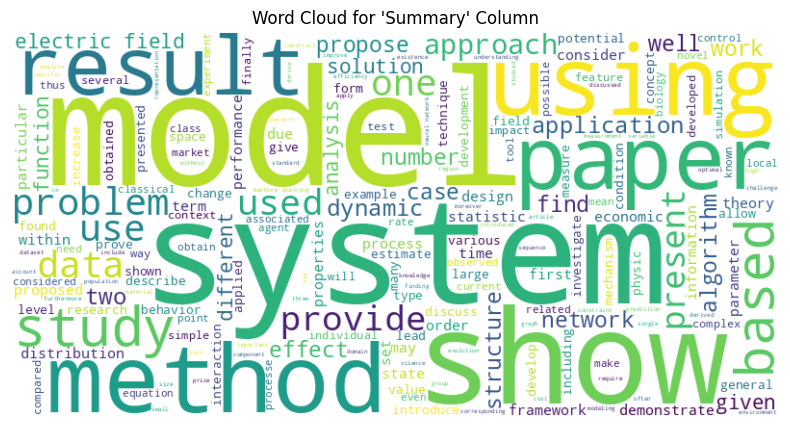

In [ ]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for 'Summary' Column")
plt.show()


In [8]:
import requests
import feedparser
import time
import math
import csv
from datetime import datetime

def fetch_arxiv_papers(search_query, total_results=10000, batch_size=100, sort_by='relevance', sort_order='descending', delay=3):
    base_url = 'http://export.arxiv.org/api/query?'
    max_batch_size = 1000

    if batch_size > max_batch_size:
        print(f"Batch size {batch_size} exceeds maximum of {max_batch_size}. Setting to {max_batch_size}.")
        batch_size = max_batch_size

    num_batches = math.ceil(total_results / batch_size)
    print(f"Total results to fetch: {total_results}")
    print(f"Fetching in {num_batches} batches of up to {batch_size} papers each.")

    all_papers = []

    for batch_num in range(num_batches):
        start = batch_num * batch_size
        current_batch_size = min(batch_size, total_results - start)
        params = {
            'search_query': f'all:{search_query}',
            'start': start,
            'max_results': current_batch_size,
            'sortBy': sort_by,
            'sortOrder': sort_order
        }

        try:
            response = requests.get(base_url, params=params)
            if response.status_code != 200:
                print(f"Error fetching batch {batch_num + 1}: HTTP {response.status_code}")
                break

            feed = feedparser.parse(response.text)

            for entry in feed.entries:
                paper = {
                    'title': entry.title.strip().replace('\n', ' '),
                    'authors': ', '.join([author.name for author in entry.authors]),
                    'summary': entry.summary.strip().replace('\n', ' '),
                    'published': entry.published,
                    'updated': entry.updated,
                    'link': entry.link,
                    'pdf_url': None,
                    'categories': ', '.join(tag.term for tag in entry.tags) if 'tags' in entry else 'N/A'
                }

                for link in entry.links:
                    if link.rel == 'related' and link.type == 'application/pdf':
                        paper['pdf_url'] = link.href
                        break

                all_papers.append(paper)

            print(f"Fetched batch {batch_num + 1}/{num_batches} (start: {start})")
            time.sleep(delay)

        except Exception as e:
            print(f"An error occurred during batch {batch_num + 1}: {str(e)}")
            break

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"arxiv_papers_{search_query.replace(' ', '_')}_{timestamp}.csv"

    with open(filename, mode='w', encoding='utf-8', newline='') as csv_file:
        fieldnames = ['title', 'authors', 'summary', 'published', 'updated', 'link', 'pdf_url', 'categories']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        writer.writeheader()
        for paper in all_papers:
            writer.writerow(paper)

    print(f"Data fetching complete. {len(all_papers)} papers saved to {filename}.")


if __name__ == "__main__":
    search_term = "Biomolecules"
    total_papers = 10000  # Total number of papers to fetch
    batch_size = 100        # Number of papers per request (adjust as needed)
    delay_seconds = 3      # Delay between requests to respect rate limits

    fetch_arxiv_papers(
        search_query=search_term,
        total_results=total_papers,
        batch_size=batch_size,
        sort_by='relevance',
        sort_order='descending',
        delay=delay_seconds
    )

Total results to fetch: 10000
Fetching in 100 batches of up to 100 papers each.
Fetched batch 1/100 (start: 0)
Fetched batch 2/100 (start: 100)
Fetched batch 3/100 (start: 200)
Fetched batch 4/100 (start: 300)
Fetched batch 5/100 (start: 400)
Fetched batch 6/100 (start: 500)
Fetched batch 7/100 (start: 600)
Fetched batch 8/100 (start: 700)
Fetched batch 9/100 (start: 800)
Fetched batch 10/100 (start: 900)
Fetched batch 11/100 (start: 1000)
Fetched batch 12/100 (start: 1100)
Fetched batch 13/100 (start: 1200)
Fetched batch 14/100 (start: 1300)
Fetched batch 15/100 (start: 1400)
Fetched batch 16/100 (start: 1500)
Fetched batch 17/100 (start: 1600)
Fetched batch 18/100 (start: 1700)
Fetched batch 19/100 (start: 1800)
Fetched batch 20/100 (start: 1900)
Fetched batch 21/100 (start: 2000)
Fetched batch 22/100 (start: 2100)
Fetched batch 23/100 (start: 2200)
Fetched batch 24/100 (start: 2300)
Fetched batch 25/100 (start: 2400)
Fetched batch 26/100 (start: 2500)
Fetched batch 27/100 (start: 26